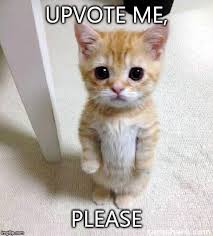

# **What is a Recommendation System?**

The rapid growth of data collection has led to a new era of information. Data is being used to create more efficient systems and this is where Recommendation Systems come into play.  Recommendation Systems are a type of **information filtering systems** as they improve the quality of search results and provides items that are more relevant to the search item or are realted to the search history of the user.  


Recommender System is a system that seeks to predict or filter preferences according to the user’s choices. Recommender systems are utilized in a variety of areas including movies, music, news, books, research articles, search queries, social tags, and products in general.
Moreover,  companies like Netflix and Spotify  depend highly on the effectiveness of their recommendation engines for their business and sucees.

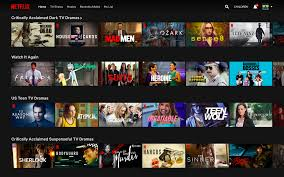

**So let's go!**

The basic system of recommendations is:-

> *  **Demographic Filtering**- They offer generalized recommendations to every user, based on movie popularity and/or genre. The System recommends the same movies to users with similar demographic features. Since each user is different , this approach is considered to be too simple. The basic idea behind this system is that movies that are more popular and critically acclaimed will have a higher probability of being liked by the average audience.



The other Recommender systems produce a list of recommendations in any of the two ways –

> : **Collaborative filtering**: Collaborative filtering approaches build a model from user’s past behavior (i.e. items purchased or searched by the user) as well as similar decisions made by other users. This model is then used to predict items (or ratings for items) that user may have an interest in.


> : **Content-based filtering**: Content-based filtering approaches uses a series of discrete characteristics of an item in order to recommend additional items with similar properties. Content-based filtering methods are totally based on a description of the item and a profile of the user’s preferences. It recommends items based on user’s past preferences.
Let’s develop a basic reco

Let's load the data now.

In [1]:
import pandas as pd 
import numpy as np 
df1=pd.read_csv('../input/movies-dataset/movie_dataset.csv')

In [2]:
df1.columns

Index(['index', 'budget', 'genres', 'homepage', 'id', 'keywords',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'vote_average', 'vote_count', 'cast', 'crew', 'director'],
      dtype='object')

The columns names are self explanagtory with the fact having the average people rating of the movies with genres , caste ,crew , budgets, director, release date and much more factual knowledge.

In [3]:
df1.head(5)

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


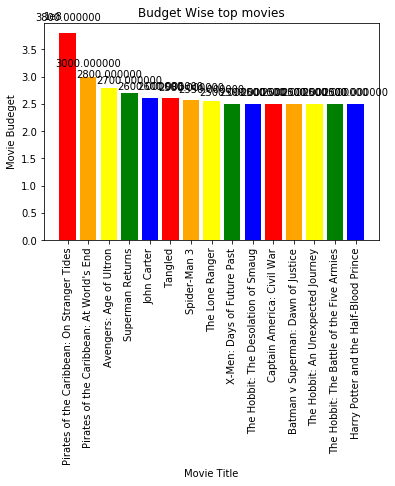

In [4]:
import matplotlib.pyplot as plt
rich=df1.sort_values('budget',ascending=False)

fig, ax = plt.subplots()
rects1 = ax.bar(rich['title'].head(15),rich['budget'].head(15), color=["Red","Orange","Yellow","Green","Blue"])
plt.xlabel("Movie Title")
plt.rcParams["figure.figsize"] = (50,50)
plt.title("Budget Wise top movies")
plt.ylabel("Movie Budeget")

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%f' % float(height/100000),
        ha='center', va='bottom')
autolabel(rects1)
plt.xticks(rotation=90)

plt.show()

In [5]:
rich1=df1.sort_values('vote_average',ascending=False)
rich1.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
3519,3519,0,Comedy,NaN,89861,italy victorian england young woman,en,Stiff Upper Lips,Stiff Upper Lips is a broad parody of British ...,0.356495,[],"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",1998-06-12,0,99.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Stiff Upper Lips,10.0,1,Georgina Cates Peter Ustinov Prunella Scales S...,"[{'name': 'Jeremy Bolt', 'gender': 0, 'departm...",Gary Sinyor
4247,4247,1,Romance Comedy Drama,NaN,361505,NaN,en,Me You and Five Bucks,"A womanizing yet lovable loser, Charlie, a wai...",0.094105,[],[],2015-07-07,0,90.0,[],Released,"A story about second, second chances",Me You and Five Bucks,10.0,2,NaN,[],NaN
4045,4045,0,Comedy Drama Family,NaN,78373,small town texas,en,"Dancer, Texas Pop. 81","Four guys, best friends, have grown up togethe...",0.376662,"[{""name"": ""HSX Films"", ""id"": 4714}, {""name"": ""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1998-05-01,565592,97.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,in the middle of nowhere they had everything,"Dancer, Texas Pop. 81",10.0,1,Breckin Meyer Peter Facinelli Eddie Mills Etha...,"[{'name': 'Tim McCanlies', 'gender': 2, 'depar...",Tim McCanlies
4662,4662,0,Comedy,NaN,40963,independent film,en,Little Big Top,An aging out of work clown returns to his smal...,0.092100,"[{""name"": ""Fly High Films"", ""id"": 24248}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2006-01-01,0,0.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Rumored,NaN,Little Big Top,10.0,1,Sid Haig Richard Riehle Mel England Jacob Zach...,[],NaN
3992,3992,0,NaN,NaN,346081,NaN,en,Sardaarji,A ghost hunter uses bottles to capture trouble...,0.296981,[],"[{""iso_3166_1"": ""IN"", ""name"": ""India""}]",2015-06-26,0,0.0,[],Released,NaN,Sardaarji,9.5,2,NaN,"[{'name': 'Rohit Jugraj', 'gender': 0, 'depart...",Rohit Jugraj


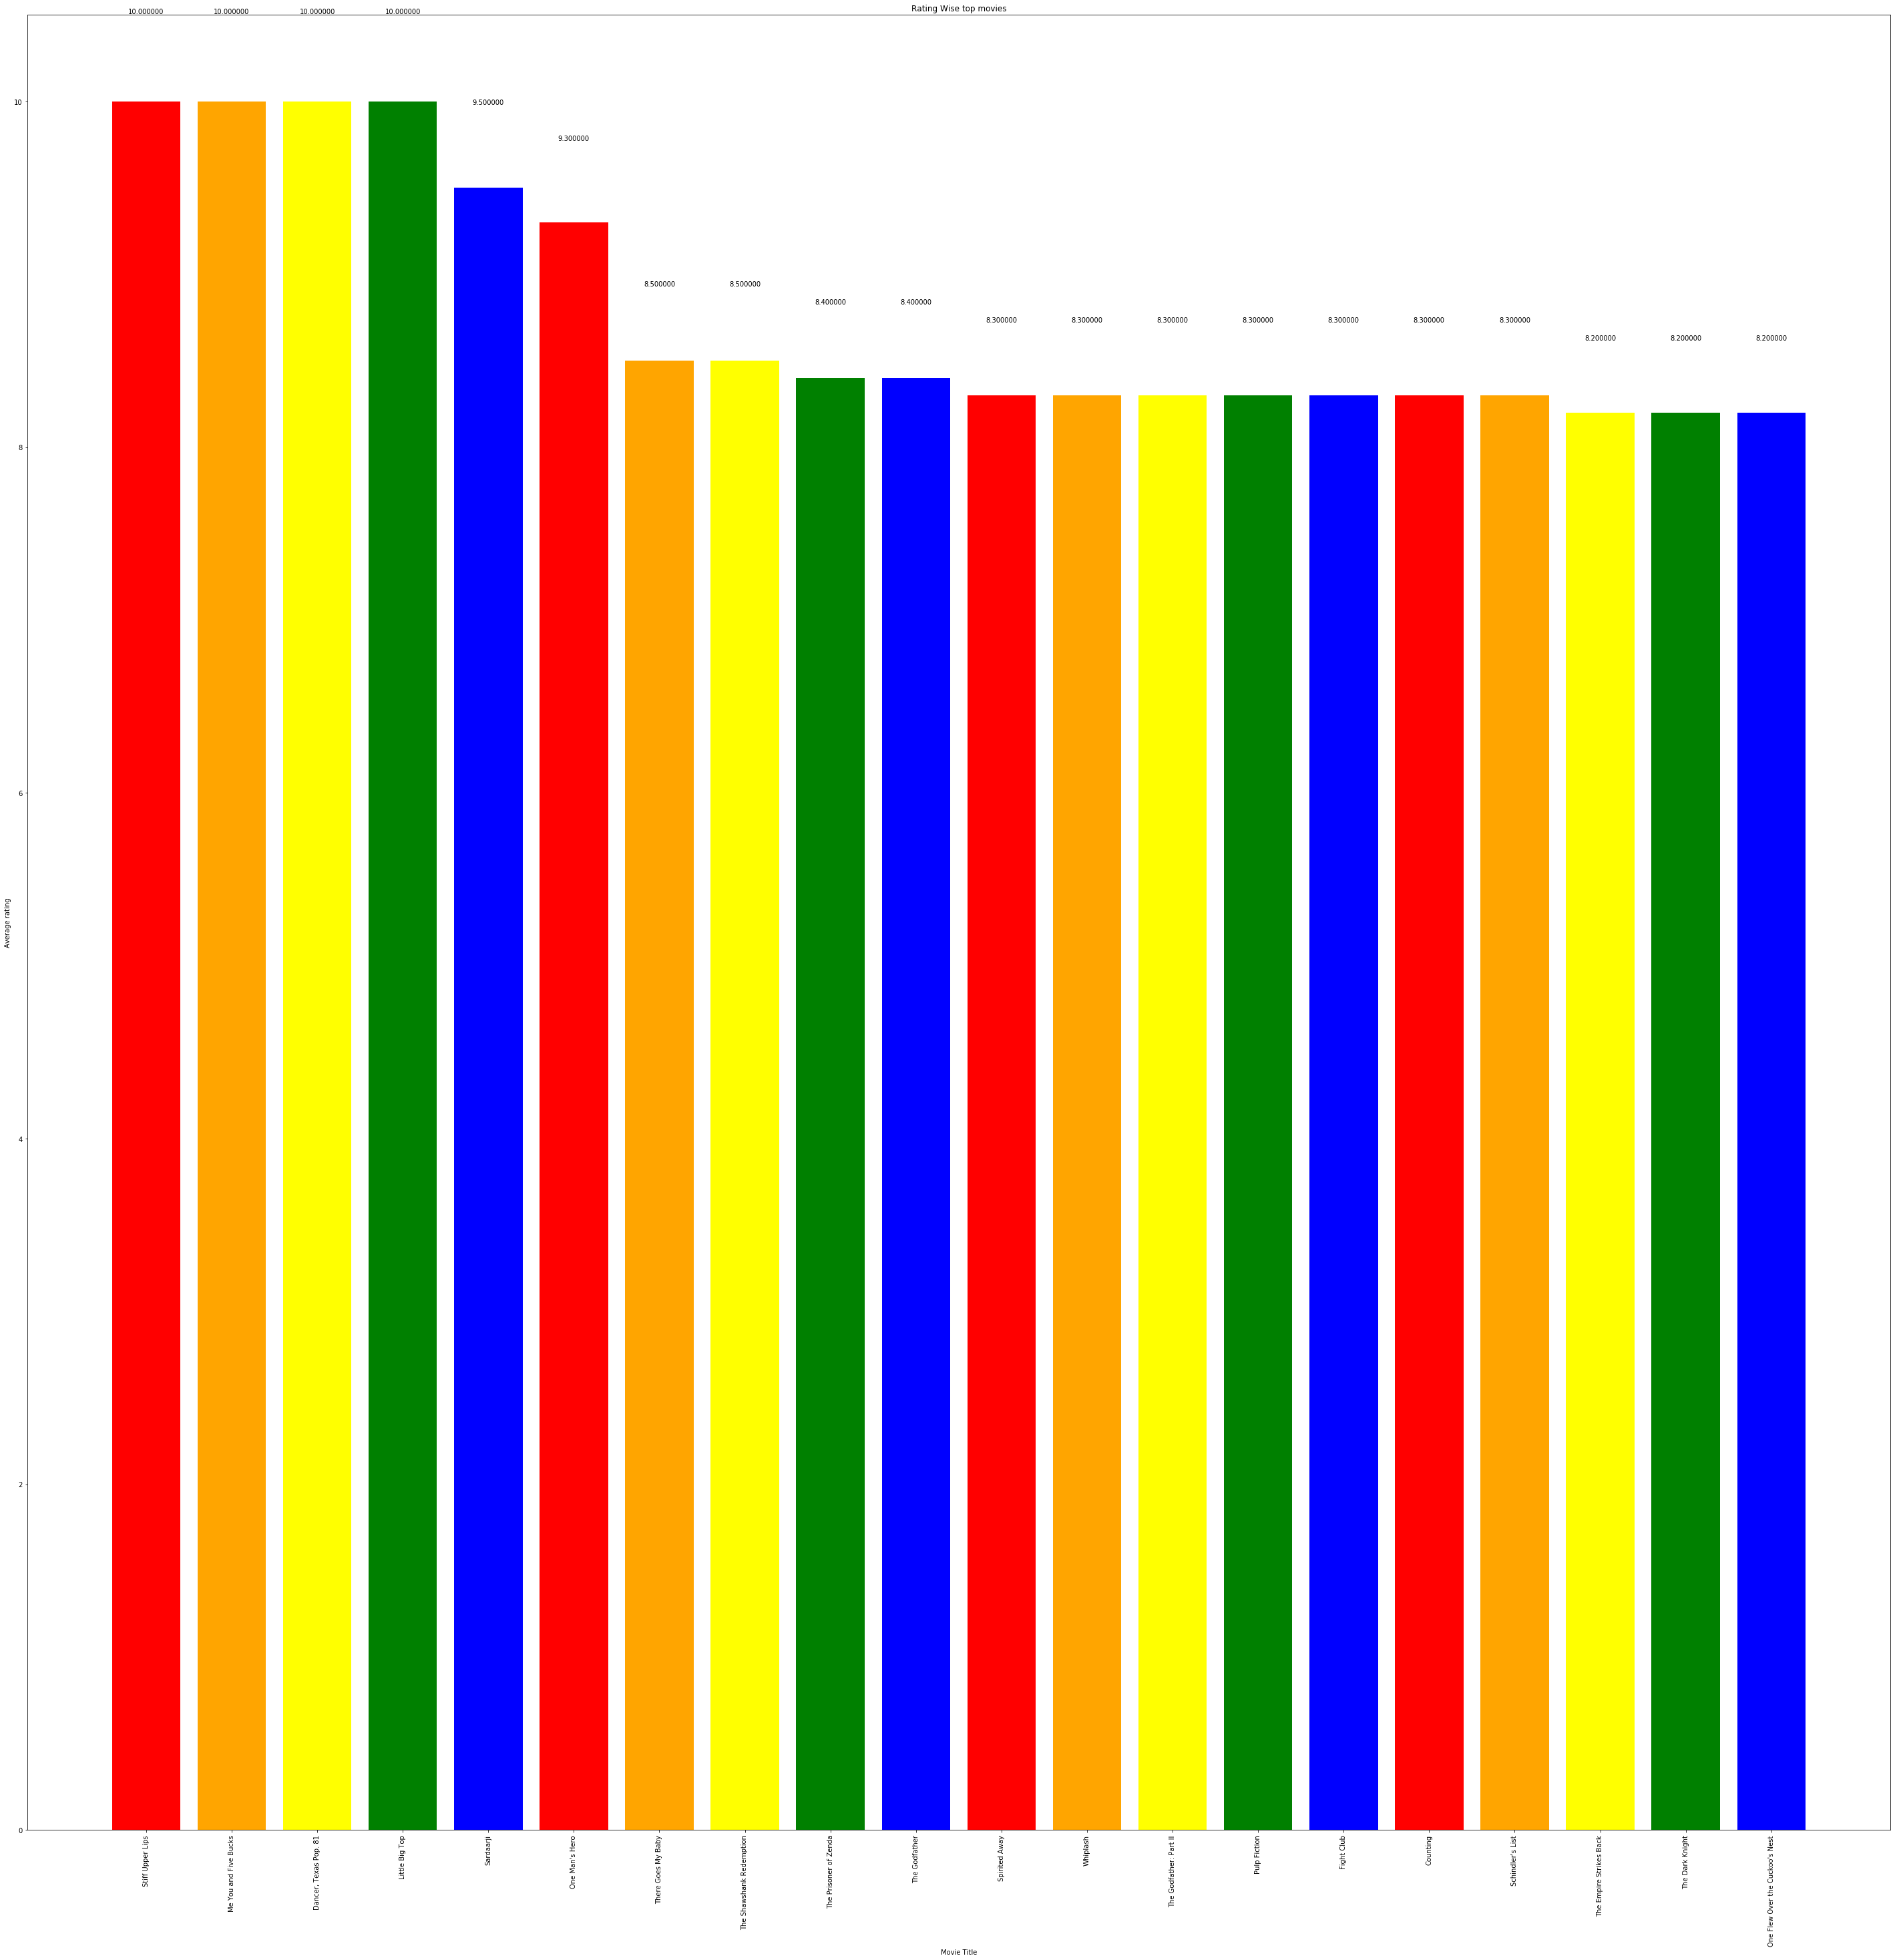

In [6]:

fig, ax = plt.subplots()
rects1 = ax.bar(rich1['title'].head(20),rich1['vote_average'].head(20), color=["Red","Orange","Yellow","Green","Blue"])
plt.xlabel("Movie Title")
plt.rcParams["figure.figsize"] = (30,20)
plt.title("Rating Wise top movies")
plt.ylabel("Average rating")

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%f' % float(height),
        ha='center', va='bottom')
autolabel(rects1)
plt.xticks(rotation=90)

plt.show()

# **Demographic Filtering** -
*This system aims to categorize the users based on attributes and make recommendations based on demographic classes. ... The benefit of a demographic approach is that it does not require a history of user ratings like that in collaborative and content based recommender systems.*
   Before getting started with this  -
* we need a metric to score or rate movie 
* Calculate the score for every movie 
* Sort the scores and recommend the best rated movie to the users.

We can use the average ratings of the movie as the score but using this won't be fair enough since a movie with 8.9 average rating and only 3 votes cannot be considered better than the movie with 7.8 as as average rating but 40 votes.
So, I'll be using IMDB's weighted rating (wr) which is given as :-

![](https://image.ibb.co/jYWZp9/wr.png)
where,
* v is the Vote_count of a movie;
* m is the minimum votes required to be listed in the top chart;
* R is the average rating of the movie; And
* C is the mean vote across the whole report

We already have v(**vote_count**) and R (**vote_average**) and C can be calculated as 

In [7]:
C= df1['vote_average'].mean()
print(C)


6.092171559442011


The average rating of a movie present in this dataset is around 6.
tThe nest step is to determine the number of vote count required for a particular movie to reflect on the top. 
For this we shall set the crieteria at 90% and find the total vote counts of the movies which are above 90%.

In [8]:
m= df1['vote_count'].quantile(0.9)
m

1838.4000000000015

Now, we can filter out the movies that qualify for the top..

In [9]:
q_movies = df1.copy().loc[df1['vote_count'] >= m]
q_movies.shape

(481, 24)

As we can see around 481 movies are present with the average vote count above m. So now lets merge them and calculate the WEIGHTED RATING.

In [10]:
def weightedrating(x,m=m,C=C):
    
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [11]:
# A new column for weighted rating named weight_score in the dataset
q_movies['weight_score'] = q_movies.apply(weightedrating, axis=1)

Lest get the top movies for the dataset

In [12]:
#Sort movies based on score calculated above
q_movies = q_movies.sort_values('weight_score', ascending=False)

#Print the top 20 movies
q_movies[['title', 'vote_count', 'vote_average', 'weight_score']].head(20)

,title,vote_count,vote_average,weight_score
1881,The Shawshank Redemption,8205,8.5,8.059258
662,Fight Club,9413,8.3,7.939256
65,The Dark Knight,12002,8.2,7.920020
3232,Pulp Fiction,8428,8.3,7.904645
96,Inception,13752,8.1,7.863239
3337,The Godfather,5893,8.4,7.851236
95,Interstellar,10867,8.1,7.809479
809,Forrest Gump,7927,8.2,7.803188
329,The Lord of the Rings: The Return of the King,8064,8.1,7.727243
1990,The Empire Strikes Back,5879,8.2,7.697884


So these are the top 20 movies which can be placed under the **'TRENDING NOW'** tab.

Text(0.5,1,'Popular Movies')

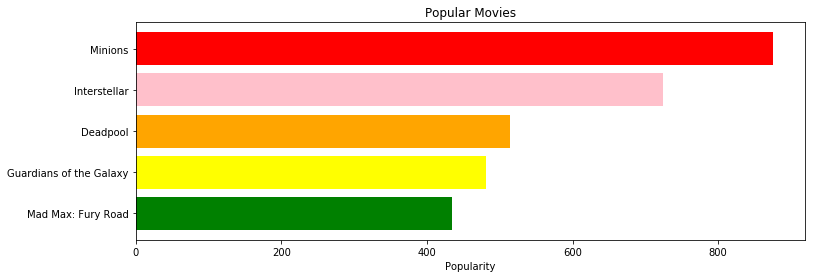

In [13]:
pop= df1.sort_values('popularity', ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.barh(pop['title'].head(5),pop['popularity'].head(5), align='center',
        color=['red','pink','orange','yellow','green'])
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")


Now something to keep in mind is that these demographic recommender provide a general chart of recommended movies to all the users. They are not sensitive to the interests and tastes of a particular user.
This is when we move on to a more refined system-  Content Basesd Filtering. 

# **Content Based Filtering**
Content-based recommenders treat recommendation as a user-specific classification problem and learn a classifier for the user's likes and dislikes based on an item's features. In this system, keywords are used to describe the items and a user profile is built to indicate the type of item this user likes.
In this recommender system the content of the movie (overview, cast, crew, keyword, tagline etc) is used to find its similarity with other movies. Then the movies that are most likely to be similar are recommended.

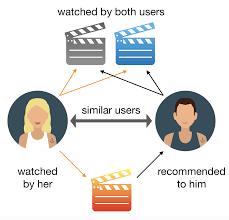

## **Credits, Genres and Keywords Based Recommender**

We will compute pairwise similarity scores for all movies based on their plot descriptions and recommend movies based on that similarity score. The plot description is given in the **overview** feature of our dataset. 
Let's take a look at the data. .. 

We are now in a good position to define our recommendation function. These are the following steps we'll follow :-

>*Get the index of the movie given its title.*



>*Get the list of cosine similarity scores for that particular movie with all movies. Convert it into a list of tuples where the first element is its position and the second is the similarity score.*



> *Sort the aforementioned list of tuples based on the similarity scores; that is, the second element.*


> *Get the top 10 elements of this list. Ignore the first element as it refers to self (the movie most similar to a particular movie is the movie itself).*


>*Return the titles corresponding to the indices of the top elements.*

In [14]:
df1['overview'].head(5)

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

For any of you who has done even a  bit of text processing before knows we need to convert the word vector of each overview.
Now we'll compute Term Frequency-Inverse Document Frequency (TF-IDF) vectors for each overview.

Now if you are wondering what is term frequency , it is the relative frequency of a word in a document and is given as
   **(term instances/total instances)**.
Inverse Document Frequency is the relative count of documents containing the term is given as 
**log(number of documents/documents with term)**
The overall importance of each word to the documents in which they appear is equal to **TF * IDF**

This will give you a matrix where each column represents a word in the overview vocabulary (all the words that appear in at least one document) and each row represents a movie, as before.This is done to reduce the importance of words that occur frequently in plot overviews and therefore, their significance in computing the final similarity score.

Fortunately, scikit-learn gives you a built-in TfIdfVectorizer class that produces the TF-IDF matrix in a couple of lines. That's great, isn't it? 

In [15]:
features = ['keywords','cast','genres','director']
##Step 3: Create a column in DF which combines all selected features

for feature in features:
   df1[feature] = df1[feature].fillna('')

def combine_features(row):
    try:
        return row['keywords'] +" "+row['cast']+" "+row["genres"]+" "+row["director"]
    except:
        print("Error:", row)

df1["combined_features"] = df1.apply(combine_features,axis=1)


We see that over 20,000 different words were used to describe the 4800 movies in our dataset.



We will be using the cosine similarity to calculate a numeric quantity that denotes the similarity between two movies. We use the cosine similarity score since it is independent of magnitude and is relatively easy and fast to calculate. Mathematically, it is defined as follows:
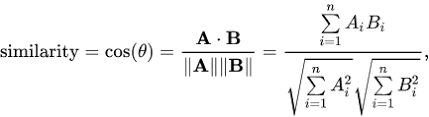

Since we have used the TF-IDF vectorizer, calculating the dot product will directly give us the cosine similarity score. Therefore, we will use sklearn's **linear_kernel()** instead of cosine_similarities() since it is faster.

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
cv = CountVectorizer()
count_matrix = cv.fit_transform(df1["combined_features"])

##Step 5: Compute the Cosine Similarity based on the count_matrix
cosine_sim = cosine_similarity(count_matrix) 
sim_df = pd.DataFrame(cosine_sim,index=df1.title,columns=df1.title)
sim_df.head()

title,Avatar,Pirates of the Caribbean: At World's End,Spectre,The Dark Knight Rises,John Carter,Spider-Man 3,Tangled,Avengers: Age of Ultron,Harry Potter and the Half-Blood Prince,Batman v Superman: Dawn of Justice,Superman Returns,Quantum of Solace,Pirates of the Caribbean: Dead Man's Chest,The Lone Ranger,Man of Steel,The Chronicles of Narnia: Prince Caspian,The Avengers,Pirates of the Caribbean: On Stranger Tides,Men in Black 3,The Hobbit: The Battle of the Five Armies,The Amazing Spider-Man,Robin Hood,The Hobbit: The Desolation of Smaug,The Golden Compass,King Kong,Titanic,Captain America: Civil War,Battleship,Jurassic World,Skyfall,Spider-Man 2,Iron Man 3,Alice in Wonderland,X-Men: The Last Stand,Monsters University,Transformers: Revenge of the Fallen,Transformers: Age of Extinction,Oz: The Great and Powerful,The Amazing Spider-Man 2,TRON: Legacy,...,Smiling Fish & Goat On Fire,Dawn of the Crescent Moon,Raymond Did It,The Last Waltz,"Run, Hide, Die",The Exploding Girl,The Legend of God's Gun,Mutual Appreciation,Her Cry: La Llorona Investigation,Down Terrace,Clerks,Pink Narcissus,Funny Ha Ha,In the Company of Men,Manito,Rampage,Slacker,Dutch Kills,Dry Spell,Flywheel,Backmask,The Puffy Chair,Stories of Our Lives,Breaking Upwards,All Superheroes Must Die,Pink Flamingos,Clean,The Circle,Tin Can Man,Cure,On The Downlow,Sanctuary: Quite a Conundrum,Bang,Primer,Cavite,El Mariachi,Newlyweds,"Signed, Sealed, Delivered",Shanghai Calling,My Date with Drew
title,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Avatar,1.000000,0.105409,0.120386,0.037743,0.230940,0.192450,0.0,0.140546,0.082061,0.117851,0.230940,0.076980,0.120386,0.115470,0.181848,0.075485,0.138260,0.123091,0.140546,0.123091,0.117851,0.078567,0.088302,0.129099,0.068041,0.086066,0.218218,0.157135,0.157135,0.123091,0.188713,0.192450,0.109109,0.145479,0.0,0.167984,0.157135,0.215166,0.113228,0.150970,...,0.000000,0.096225,0.0,0.0,0.000000,0.046676,0.055556,0.000000,0.053376,0.039284,0.0,0.055556,0.000000,0.000000,0.000000,0.041996,0.048113,0.000000,0.0,0.000000,0.099381,0.000000,0.000000,0.041996,0.129099,0.040129,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.070273,0.000000,0.075485,0.0,0.000000,0.000000,0.0
Pirates of the Caribbean: At World's End,0.105409,1.000000,0.076139,0.035806,0.073030,0.255604,0.0,0.066667,0.116775,0.111803,0.109545,0.073030,0.609110,0.219089,0.103510,0.071611,0.065583,0.194625,0.033333,0.116775,0.149071,0.074536,0.083771,0.081650,0.064550,0.000000,0.069007,0.149071,0.111803,0.077850,0.250640,0.073030,0.172516,0.069007,0.0,0.079682,0.074536,0.081650,0.107417,0.071611,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.052705,0.000000,0.000000,0.037268,0.0,0.000000,0.000000,0.040825,0.000000,0.039841,0.000000,0.000000,0.0,0.040825,0.000000,0.000000,0.000000,0.000000,0.000000,0.038069,0.041885,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.035806,0.0,0.036515,0.000000,0.0
Spectre,0.120386,0.076139,1.000000,0.163572,0.208514,0.125109,0.0,0.190347,0.088911,0.170251,0.125109,0.333623,0.086957,0.083406,0.157622,0.163572,0.149801,0.088911,0.038069,0.088911,0.085126,0.085126,0.047836,0.186501,0.073721,0.000000,0.118217,0.085126,0.085126,0.489010,0.163572,0.125109,0.157622,0.157622,0.0,0.091003,0.127688,0.093250,0.204465,0.122679,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.060193,0.000000,0.000000,0.085126,0.0,0.000000,0.000000,0.000000,0.000000,0.091003,0.000000,0.055728,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.043478,0.000000,0.000000,0.000000,0.173913,0.000000,0.000000,0.000000,0.000000,0.000000,0.081786,0.0,0.000000,0.111456,0.0
The Dark Knight Rises,0.037743,0.035806,0.163572,1.000000,0.039223,0.078446,0.0,0.035806,0.083624,0.120096,0.117670,0.235339,0.040893,0.039223,0.148250,0.000000,0.035223,0.041812,0.071611,0.041812,0.040032,0.040032,0.000000,0.000000,0.069338,0.087706,0.037062,0.080064,0.080064,0.125436,0.076923,0.078446,0.074125,0.074125,0.0,0.08

In [17]:
movie_user_likes = "Avatar"
sim_df[movie_user_likes].sort_values(ascending=False)[:20]

title
Avatar                             1.000000
Guardians of the Galaxy            0.423390
Aliens                             0.377426
Star Wars: Clone Wars: Volume 1    0.346410
Star Trek Into Darkness            0.344265
Star Trek Beyond                   0.335968
Alien                              0.333333
Lockout                            0.314270
Jason X                            0.307920
The Helix... Loaded                0.288675
Moonraker                          0.285897
Planet of the Apes                 0.281091
Galaxy Quest                       0.280900
Gravity                            0.276520
Alien³                             0.274986
Jupiter Ascending                  0.274986
The Wolverine                      0.269430
Silent Running                     0.269430
Zathura: A Space Adventure         0.264198
Trekkies                           0.264198
Name: Avatar, dtype: float64

In [18]:
movie_user_likes = "Gravity"
sim_df[movie_user_likes].sort_values(ascending=False)[:20]

title
Gravity                      1.000000
The Astronaut's Wife         0.387458
Space Dogs                   0.345651
Silent Running               0.323290
Cargo                        0.311086
Alien                        0.311086
Moonraker                    0.300167
Planet of the Apes           0.295122
Jason X                      0.287368
Guardians of the Galaxy      0.287368
Avatar                       0.276520
In the Shadow of the Moon    0.268044
Elysium                      0.268044
Wing Commander               0.266815
Children of Men              0.256632
Starship Troopers            0.246564
Star Trek                    0.229752
The Right Stuff              0.229752
Space Chimps                 0.229752
Sunshine                     0.224702
Name: Gravity, dtype: float64

#  *COLLABORATIVE FITTING MODEL* 





In [19]:
from scipy import sparse
from sklearn.metrics.pairwise import cosine_similarity
ratings = pd.read_csv("../input/colab-fitting/toy_dataset.csv",index_col=0)
ratings = ratings.fillna(0)
ratings

,action1,action2,action3,romantic1,romantic2,romantic3
user 1,4.0,5.0,3.0,0.0,2.0,1.0
user 2,5.0,3.0,3.0,2.0,2.0,0.0
user 3,1.0,0.0,0.0,4.0,5.0,4.0
user 4,0.0,2.0,1.0,4.0,0.0,3.0
user 5,1.0,0.0,2.0,3.0,3.0,4.0


# We are taking a transpose since we want similarity between items which need to be in rows

In [20]:
def standardize(row):
    new_row = (row - row.mean())/(row.max()-row.min())
    return new_row

ratings_std = ratings.apply(standardize)


item_similarity = cosine_similarity(ratings_std.T)
print(item_similarity)

[[ 1.          0.70668875  0.81368151 -0.79941088 -0.02539184 -0.91410609]
 [ 0.70668875  1.          0.72310153 -0.84515425 -0.5189993  -0.84337386]
 [ 0.81368151  0.72310153  1.         -0.84794611 -0.3799803  -0.80218063]
 [-0.79941088 -0.84515425 -0.84794611  1.          0.14803913  0.72374686]
 [-0.02539184 -0.5189993  -0.3799803   0.14803913  1.          0.39393939]
 [-0.91410609 -0.84337386 -0.80218063  0.72374686  0.39393939  1.        ]]


In [21]:
item_similarity_df = pd.DataFrame(item_similarity,index=ratings.columns,columns=ratings.columns)
item_similarity_df

,action1,action2,action3,romantic1,romantic2,romantic3
action1,1.000000,0.706689,0.813682,-0.799411,-0.025392,-0.914106
action2,0.706689,1.000000,0.723102,-0.845154,-0.518999,-0.843374
action3,0.813682,0.723102,1.000000,-0.847946,-0.379980,-0.802181
romantic1,-0.799411,-0.845154,-0.847946,1.000000,0.148039,0.723747
romantic2,-0.025392,-0.518999,-0.379980,0.148039,1.000000,0.393939
romantic3,-0.914106,-0.843374,-0.802181,0.723747,0.393939,1.000000


RECOMMENDATIONS AS FOLLOWS:-

In [22]:

def get_similar_movies(movie_name,user_rating):
    similar_score = item_similarity_df[movie_name]*(user_rating-2.5)
    similar_score = similar_score.sort_values(ascending=False)
    
    return similar_score

print(get_similar_movies("romantic3",1))

action1      1.371159
action2      1.265061
action3      1.203271
romantic2   -0.590909
romantic1   -1.085620
romantic3   -1.500000
Name: romantic3, dtype: float64


In [23]:
action_lover = [("action1",5),("romantic2",1),("romantic3",1)]

similar_movies = pd.DataFrame()

for movie,rating in action_lover:
    similar_movies = similar_movies.append(get_similar_movies(movie,rating),ignore_index=True)

similar_movies.head()
similar_movies.sum().sort_values(ascending=False)

action1      3.909247
action2      3.810282
action3      3.807445
romantic2   -2.154389
romantic1   -3.306206
romantic3   -4.376174
dtype: float64

## Please upvote and suggest other methods for recommendations...